# Tutorial: Conceptos básicos de Tensorflow
En este tutorial veremos algunos conceptos importantes para poder comenzar a utilizar tensorflow para tareas de deep learning.

## Tensores
Un **tensor** es un arreglo multidimensional con elementos del mismo tipo (dtype). En escencia, un tensor de tensorflow es muy similar en comportamiento a un array de numpy con algunas diferencias y funcionalidades agregadas.
Por definición, todos los tensores son *inmutables*, es decir que no se puede actualizar el contenido de uno, solamente crear uno nuevo.


### Operaciones básicas
Veremos como crear y definir tensores usando tensorflow


In [ ]:
import tensorflow as tf
import numpy as np

# crear un tensor de rango 0, un escalar, no contiene ejes
simple_tensor = tf.constant(4)
print(simple_tensor)


In [ ]:
# un tensor de rango 1 es similar a una lista de valores, tiene un eje
r1_tensor = tf.constant([2.0,3.0,4.0,5.0])
print(r1_tensor)

In [ ]:
# un tensor de rango 2 es una matriz
r2_tensor = tf.constant([[2.0,3.0,4.0,5.0],[1.0,2.0,0.0,1.0]])
print(r2_tensor)

In [ ]:
# un tensor puede tener un numero arbitrario de ejes o dimensiones
rank_3_tensor = tf.constant([
  [[0, 1.0, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],], dtype=tf.float16)
                    
print(rank_3_tensor)

Hay varias formas de visualizar un tensor de más de 2 dimensiones
![tensor](img/3atensor.png)

In [ ]:
# se puede convertir un tensor a un array de numpy de varias maneras:
M = np.array(r2_tensor)
M2 = r2_tensor.numpy()
print(type(M))
print(type(M2))

In [ ]:
# se pueden realizar operaciones basicas con tensores como adicion, multiplicacion y multiplicacion de matrices
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 1]]) # tambien se puede usar `tf.ones([2,2])`

print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")
print('numpy:',np.dot(a.numpy(), b.numpy()))
print(a + b, "\n") # element-wise addition
print(a * b, "\n") # element-wise multiplication
print(a @ b, "\n") # matrix multiplication

In [ ]:
# se pueden usar tensores en todo tipo de operaciones adicionales
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])

# valor maximo
print(tf.reduce_max(c))
# indice del valor maximo
print(tf.argmax(c))
# calcular la funcion softmax
print(tf.nn.softmax(c))

Se tienen alguas definiciones importantes (similares a numpy):

  - **shape** es el tamaño (numero de elementos) de cada dimension de un tensor.
  - **rank** es el numero de dimensiones del tensor, un escalar tiene rank 0, una matriz rank 2
  - **axis** o **dimension** es una dimensión en particular de un tensor.
  - **size** el numero total de elementos de un tensor, el producto del vector *shape*.
  
Podemos visualizar para un tensor de rank 4


![r4](img/4atensor.png)


In [ ]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])

print("Tipo de cada elemento:", rank_4_tensor.dtype)
print("Numero de dimensiones:", rank_4_tensor.ndim)
print("Shape:", rank_4_tensor.shape)
print("Elementos en el eje 0 del tensor:", rank_4_tensor.shape[0])
print("Elementos en el ultimo eje del tensor:", rank_4_tensor.shape[-1])
print("Numero total de elementos (3*2*4*5): ", tf.size(rank_4_tensor).numpy())

In [ ]:
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
# indexado con un escalar
print(rank_1_tensor.numpy())
print("First:", rank_1_tensor[0].numpy())
print("Second:", rank_1_tensor[1].numpy())
print("Last:", rank_1_tensor[-1].numpy())
# indexado con un slice
print("Everything:", rank_1_tensor[:].numpy())
print("Before 4:", rank_1_tensor[:4].numpy())
print("From 4 to the end:", rank_1_tensor[4:].numpy())
print("From 2, before 7:", rank_1_tensor[2:7].numpy())
print("Every other item:", rank_1_tensor[::2].numpy())
print("Reversed:", rank_1_tensor[::-1].numpy())

In [ ]:
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
print(rank_2_tensor.numpy())
                            
# pasando un entero por cada dimension, arroja un escalar
print(rank_2_tensor[1, 1].numpy())

# Se puede indexar usando combinaciones de escalares y slices
print("Second row:", rank_2_tensor[1, :].numpy())
print("Second column:", rank_2_tensor[:, 1].numpy())
print("Last row:", rank_2_tensor[-1, :].numpy())
print("First item in last column:", rank_2_tensor[0, -1].numpy())
print("Skip the first row:")
print(rank_2_tensor[1:, :].numpy(), "\n")

In [ ]:
print(rank_3_tensor)

In [ ]:
# ejemplo de un tensor de 3 dimensiones
print(rank_3_tensor[:, :, 4].shape)

![3slice](img/3rslice.png)

## Variables
Una variable de tensorflow es una forma de representar algun estado persistente que se puede manipular por un programa.
Las variables son manipuladas a traves de la clase 'tf.variable'. Una variable de tensorflow representa un **tensor** cuyo valor puede cambiar mediante la ejecución de **operaciones** sobre la misma. Las operaciones u **ops** permiten leer y modificar los valores de un tensor. 

Usualmente las variables de tensorflow se usan para almacenar los pesos del modelo de red neuronal.


In [ ]:
# para crear una variable 
mi_variable = tf.Variable(tf.zeros([1, 2, 3]))
print(mi_variable)
# para usar una variable simplemente se puede operar como si fuera un tensor normal
v = tf.Variable(0.0)
w = v + 1 
print(w)

In [ ]:
# se puede asignar un nuevo valor o incrementar una variable
v = tf.Variable(3.1)
print(v)
v.assign(1.0)
print(v)
v.assign_add(1)
v.assign_add(2)

print(v)

## Cálculo automático de gradientes

Para poder usar la capacidad de diferenciación automática de tensorflow, se necesita recordar todas las operaciones que han ocurrido y el orden de ocurrencia durante el *forward pass*. Luego, durante el *backward pass*, tensorflow puede recorrer la lista de operaciones y calcular las grandientes.

### Gradient tapes
Tensorflow provee la API de **tf.GradientTape** para la diferenciación automática y poder calcular las gradientes de un grafo de cómputo con respecto a ciertas variables de entrada. Tensorflow "recuerda" todas las operaciones ejecutadas dentro el contexto de **tf.GradienTape** en un *tape*. Luego, se usa ese tape y las gradientes asociadas con cada operacion para calcular las gradientes restantes.


In [ ]:
x = tf.constant(3.0)
# y = x ^ 2
with tf.GradientTape() as t:
  t.watch(x)        # para grabar las operacioens sobre x
  z = 1 * tf.exp(x)
  y = x * z
# dy = 2x
dy_dx = t.gradient(y, x)
dy_dx.numpy()

In [ ]:
x = tf.constant([3.0, 3.0])

with tf.GradientTape() as t:
  t.watch(x)
  z = tf.multiply(x, x)

print(z)

# Find derivative of z with respect to the original input tensor x
print(t.gradient(z, x))


Es importante usar siempre tensores dentro de las operaciones del tape para garantizar el calculo de gradientes adecuado. Si se tiene un valor fijo, primero se debe convertirlo a un tensor con tf.constant antes de usarlo en el flujo.


Tambien se puede solicitar gradientes de la salida con respecto a valores intermedios calculados durante una "grabación" de un contexto tf.GradientTape

In [ ]:
x = tf.constant([3.0, 3.0])

with tf.GradientTape() as t:
  t.watch(x)
  y = tf.multiply(x, x)
  z = tf.multiply(y, y)

# Se usa el tape para calcular la derivada de z con respecto al valor intermedio y
# dz_dx = 2 * y, donde: y = x ^ 2
print(t.gradient(z, y))


In [ ]:
x = tf.Variable(2.0)
y = tf.Variable(3.0)

with tf.GradientTape() as t:
  # No hay necesidad de invocar watch
  y_sq = y * y
  z = x + y_sq

print(t.watched_variables())
print(t.gradient(z,y))


## Regresion lineal en tensorflow


In [24]:
from sklearn.datasets import load_diabetes
import random
# X y y ya son arrays de numpy
X, y = load_diabetes(return_X_y=True)

m = X.shape[0]
unos = np.ones((m, 1))
X = np.append(unos, X, axis=1)

X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
print(X.shape, y.shape)

(442, 11) (442,)


In [27]:
n = 20
alpha = tf.constant(0.001, dtype=tf.float32)
theta = tf.Variable(tf.random.uniform([X.shape[1], 1], minval=-1, maxval=1), dtype=tf.float32)
print(theta.shape)
cost_history = []
z = tf.matmul(X, theta)
print(f"z: {z.shape}")
cost_history.append((1/(2 * m)) * tf.math.reduce_sum(tf.square(z - y)))
print(f'costo inicial: {cost_history[0]}')

(11, 1)
z: (442, 1)
costo inicial: 6440827.0


In [28]:
# entrenamiento usando gradient tape
for _ in range(n):
    #forward pass
    with tf.GradientTape() as t:
        t.watch(theta)
        ## regresion lineal
        z = tf.matmul(X, theta)
        # costo
        # (1/(2*m))*np.sum(np.square(hyp(x, w, b) - y))
        J = (1/(2 * m)) * tf.math.reduce_sum(tf.square(z - y))
        cost_history.append(J)
        print(J)

    dtheta = t.gradient(J, theta)
    # print(f'dtheta: {dtheta}')
    theta = theta - dtheta * alpha

print('terminado')
print(f'costo inicial: {cost_history[0]}\ncosto final: {cost_history[-1]}')

tf.Tensor(6440827.0, shape=(), dtype=float32)
tf.Tensor(2907903.2, shape=(), dtype=float32)
tf.Tensor(1807878.1, shape=(), dtype=float32)
tf.Tensor(1465369.9, shape=(), dtype=float32)
tf.Tensor(1358725.2, shape=(), dtype=float32)
tf.Tensor(1325520.0, shape=(), dtype=float32)
tf.Tensor(1315181.0, shape=(), dtype=float32)
tf.Tensor(1311961.9, shape=(), dtype=float32)
tf.Tensor(1310959.4, shape=(), dtype=float32)
tf.Tensor(1310647.4, shape=(), dtype=float32)
tf.Tensor(1310550.2, shape=(), dtype=float32)
tf.Tensor(1310520.0, shape=(), dtype=float32)
tf.Tensor(1310510.5, shape=(), dtype=float32)
tf.Tensor(1310507.5, shape=(), dtype=float32)
tf.Tensor(1310506.6, shape=(), dtype=float32)
tf.Tensor(1310506.4, shape=(), dtype=float32)
tf.Tensor(1310506.2, shape=(), dtype=float32)
tf.Tensor(1310506.2, shape=(), dtype=float32)
tf.Tensor(1310506.0, shape=(), dtype=float32)
tf.Tensor(1310506.0, shape=(), dtype=float32)
terminado
costo inicial: 6440827.0
costo final: 1310506.0


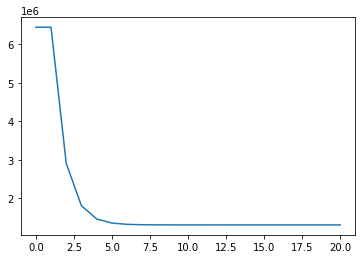

In [29]:
import matplotlib.pyplot as plt
it = list(range(n + 1))
plt.plot(it, cost_history)
plt.show()